In [1]:
#we'll carry out some EDA to come up with insights that will determine 
#which model we are going to use and how it will be implemented

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime 

In [3]:
df = pd.read_csv('clean_sal_data.csv', parse_dates=['Founded'])
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,State,Age,job_in_HQ,has_python,has_spark,has_sql,has_rstudio,has_excel,has_aws,has_tableau
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,48,0,1,0,0,0,1,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,37,1,1,0,0,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,11,1,1,1,1,0,1,0,0
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,56,1,1,0,0,0,0,0,0
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,23,1,1,0,1,0,1,0,0


In [4]:
def simple_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    
    elif 'analyst' in title.lower():
        return 'analyst'
    
    elif 'data engineer' in title.lower():
        return 'data engineer'
    
    elif 'machine learning' in title.lower():
        return 'mle'
    
    elif 'manager' in title.lower():
        return 'manager'
    
    elif 'director' in title.lower():
        return 'director'
    
    else:
        return 'na'
    
#simple_title('data analyst and visualizer')

def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'snr' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower() or 'jnr' in title.lower():
        return 'junior'
    
    else:
        return 'na'

In [5]:
df['title_simp'] = df['Job Title'].apply(simple_title)
df.title_simp.value_counts()

data scientist    279
na                184
data engineer     118
analyst           103
manager            22
mle                22
director           14
Name: title_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [7]:
#Let's remove the whitespace from either side of the states
#LA is not a state, let's fix Los Angeles by making the state CA 
df.State = df.State.str.strip()

In [8]:
#Let's create a column that shows the length of the Job Description 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [9]:
#let's count the number of competitors each company has 
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)
#df['num_competitors']


In [10]:
df[['Competitors', 'num_competitors']]

,Competitors,num_competitors
0,-1,0
1,-1,0
2,-1,0
3,"Oak Ridge National Laboratory, National Renewa...",3
4,"Commerce Signals, Cardlytics, Yodlee",3
...,...,...
737,"Pfizer, AstraZeneca, Merck",3
738,"See Tickets, TicketWeb, Vendini",3
739,-1,0
740,-1,0


In [11]:
df['num_competitors'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_competitors, dtype: int64

In [12]:
#let's find the min, max and avg annual salary for jobs that pay hourly 
#the average no. of hours worked in a year is 2000
#so we will multiply our hourly wage by 2000 and then divide it by 1000 bc we want it in thousands
#so we are just basically multiplying the hourly wage by 2 

In [13]:
df[df['hourly']==1].head() #it should be noted that the wages in this case are in just dollars
#not thousands of dollars

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,has_spark,has_sql,has_rstudio,has_excel,has_aws,has_tableau,title_simp,seniority,desc_len,num_competitors
165,Medical Lab Scientist,17-24,Overview\r\n\r\nAbout\r\n\r\n\r\nTower Health ...,3.6,Tower Health,"West Reading, PA","Reading, PA",5001 to 10000 employees,2017,Nonprofit Organization,...,0,0,0,0,0,0,na,na,2145,0
177,MED TECH/LAB SCIENTIST - LABORATORY,21-34,Evening: 3P-1130P or Night Shift 11P-730A\r\n\...,3.6,Beebe Healthcare,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,0,0,0,0,0,0,na,na,2762,0
197,Medical Laboratory Scientist,18-25,Description\r\nMedical Laboratory Scientist - ...,4.0,Texas Health Huguley Hospital,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,...,0,0,0,0,1,0,na,na,5215,0
202,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,21-34,Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,...,0,0,0,0,0,0,na,na,2840,0
210,Medical Technologist / Clinical Laboratory Sci...,15-25,The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administration","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,...,0,0,0,0,0,0,na,na,9347,0


In [14]:
df['min_sal'] = df.apply(lambda x: x['min_sal']*2 if x['hourly']==1 else x['min_sal'], axis=1)

In [15]:
df[df['hourly']==1][['hourly','min_sal', 'max_sal']].head() #it worked

,hourly,min_sal,max_sal
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25


In [16]:
df['max_sal'] = df.apply(lambda x: x['max_sal']*2 if x['hourly']==1 else x['max_sal'], axis=1)

In [17]:
df[df['hourly']==1][['hourly','min_sal', 'max_sal', 'avg_sal']].head() #it worked

,hourly,min_sal,max_sal,avg_sal
165,1,34,48,20.5
177,1,42,68,27.5
197,1,36,50,21.5
202,1,42,68,27.5
210,1,30,50,20.0


In [18]:
df['avg_sal'] = df.apply(lambda x: (x['min_sal']+x['max_sal'])/2 if x['hourly']==1 else x['avg_sal'], axis=1)

In [19]:
df[df['hourly']==1][['hourly','min_sal', 'max_sal', 'avg_sal']].head() #it worked
#now all the salary data is expressed in thousands annually!

,hourly,min_sal,max_sal,avg_sal
165,1,34,48,41.0
177,1,42,68,55.0
197,1,36,50,43.0
202,1,42,68,55.0
210,1,30,50,40.0


In [20]:
df.describe()

,Rating,hourly,Employer Provided Sal,min_sal,max_sal,avg_sal,Age,job_in_HQ,has_python,has_spark,has_sql,has_rstudio,has_excel,has_aws,has_tableau,desc_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,0.032345,0.022911,74.719677,128.149596,101.434636,47.524259,0.681941,0.528302,0.225067,0.512129,0.001348,0.522911,0.237197,0.199461,3910.172507,1.053908
std,0.801210,0.177034,0.149721,30.980593,45.220324,37.546122,53.839080,0.466037,0.499535,0.417908,0.500190,0.036711,0.499812,0.425651,0.399865,1533.827777,1.384239
min,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3781.500000,0.000000
75%,4.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4772.000000,3.000000
max,5.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


NB: -1 means there are no ratings for that company


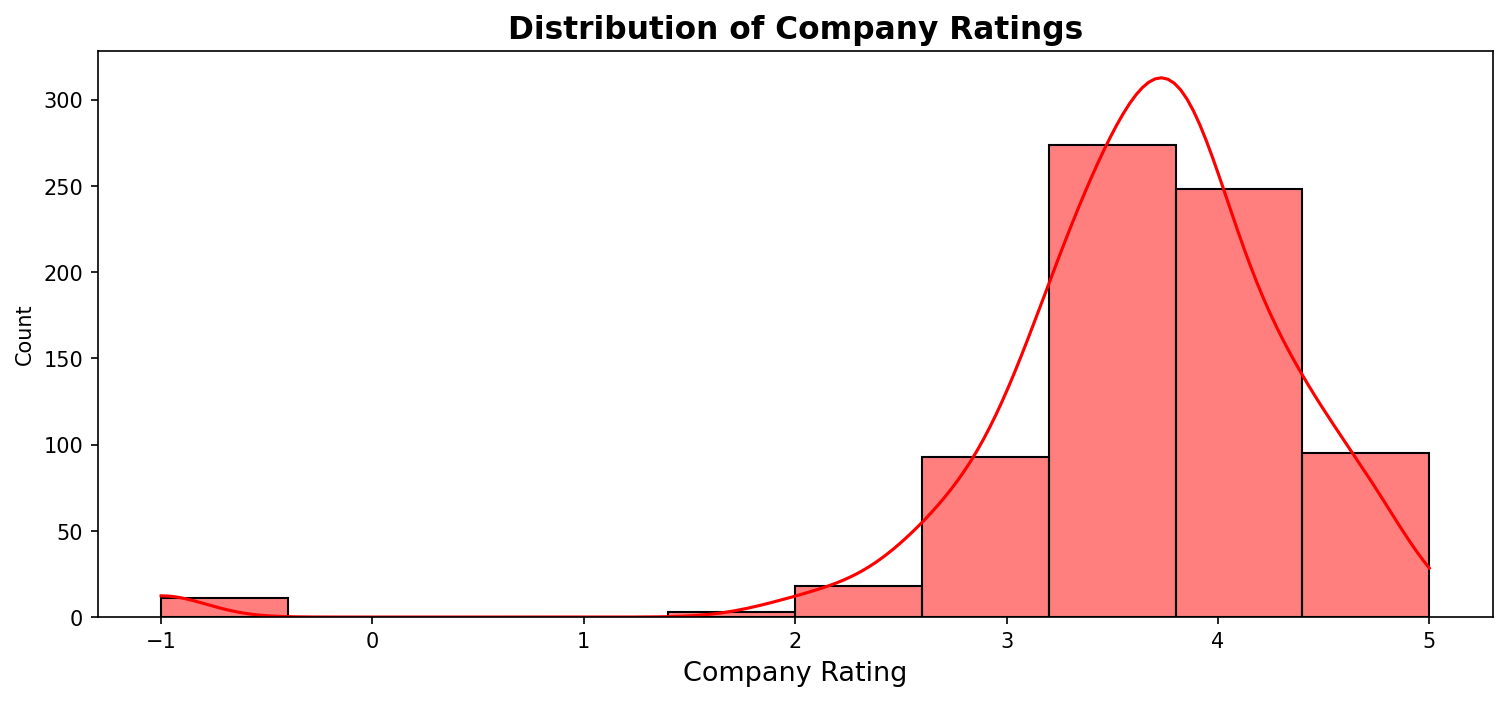

In [21]:
#let's look at the distibutions of company ratings using a histogram 
print(f'NB: -1 means there are no ratings for that company')

fig, ax = plt.subplots(1,1,figsize=(12,5),dpi=150)

fig = sns.histplot(data=df,
                   x=df.Rating,
                   ax=ax,
                   bins=10,
                   color='red',
                   kde=True)

fig.set_title('Distribution of Company Ratings',
              fontsize=15,
              color='black',
              fontweight=700)

fig.set_xlabel('Company Rating',
               fontsize=13)

plt.show()

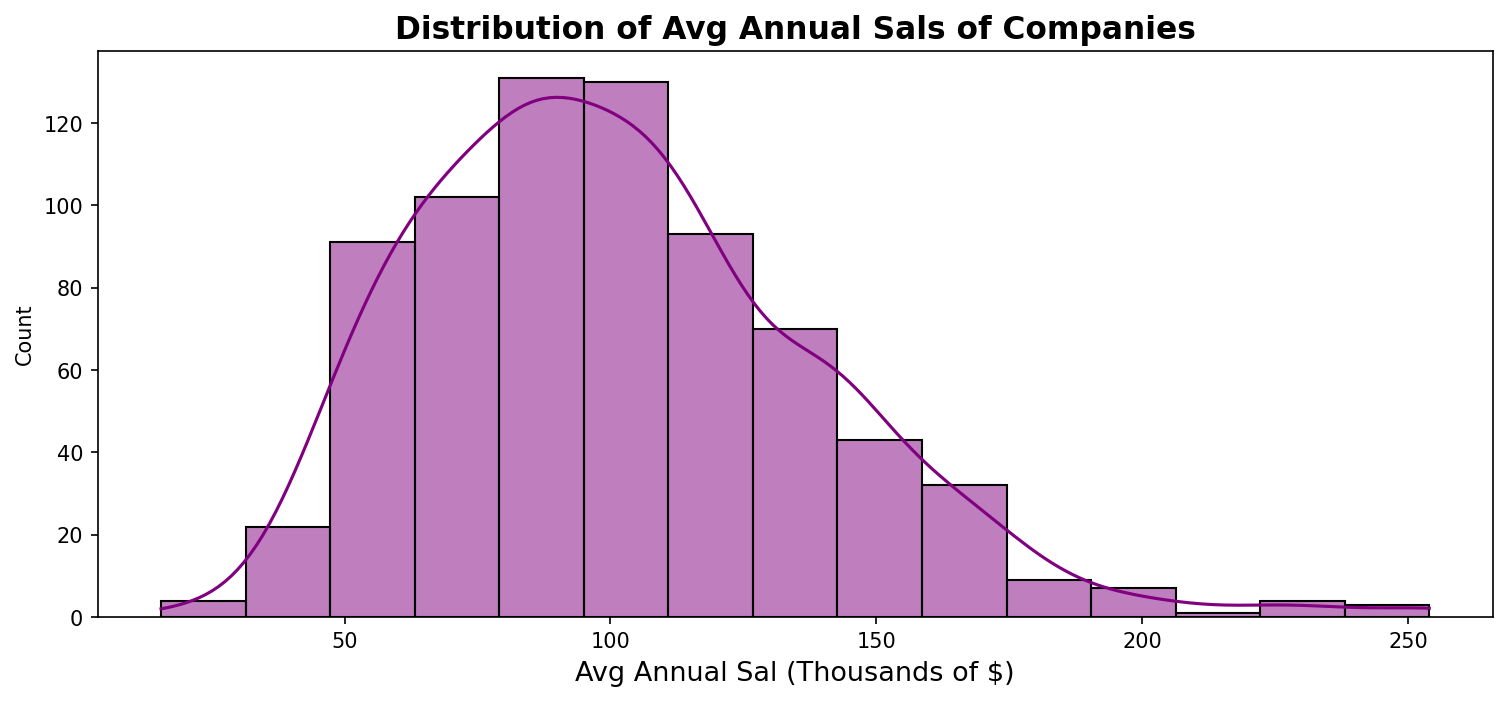

In [22]:
#dist of avg salaries across companies 
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=150)

fig = sns.histplot(data=df,
                   ax=ax,
                   x=df.avg_sal,
                   bins=15,
                   color='purple',
                   kde=True)

fig.set_title('Distribution of Avg Annual Sals of Companies',
              fontsize=15,
              color='black',
              fontweight=700)

fig.set_xlabel('Avg Annual Sal (Thousands of $)',
               fontsize=13)

plt.show()

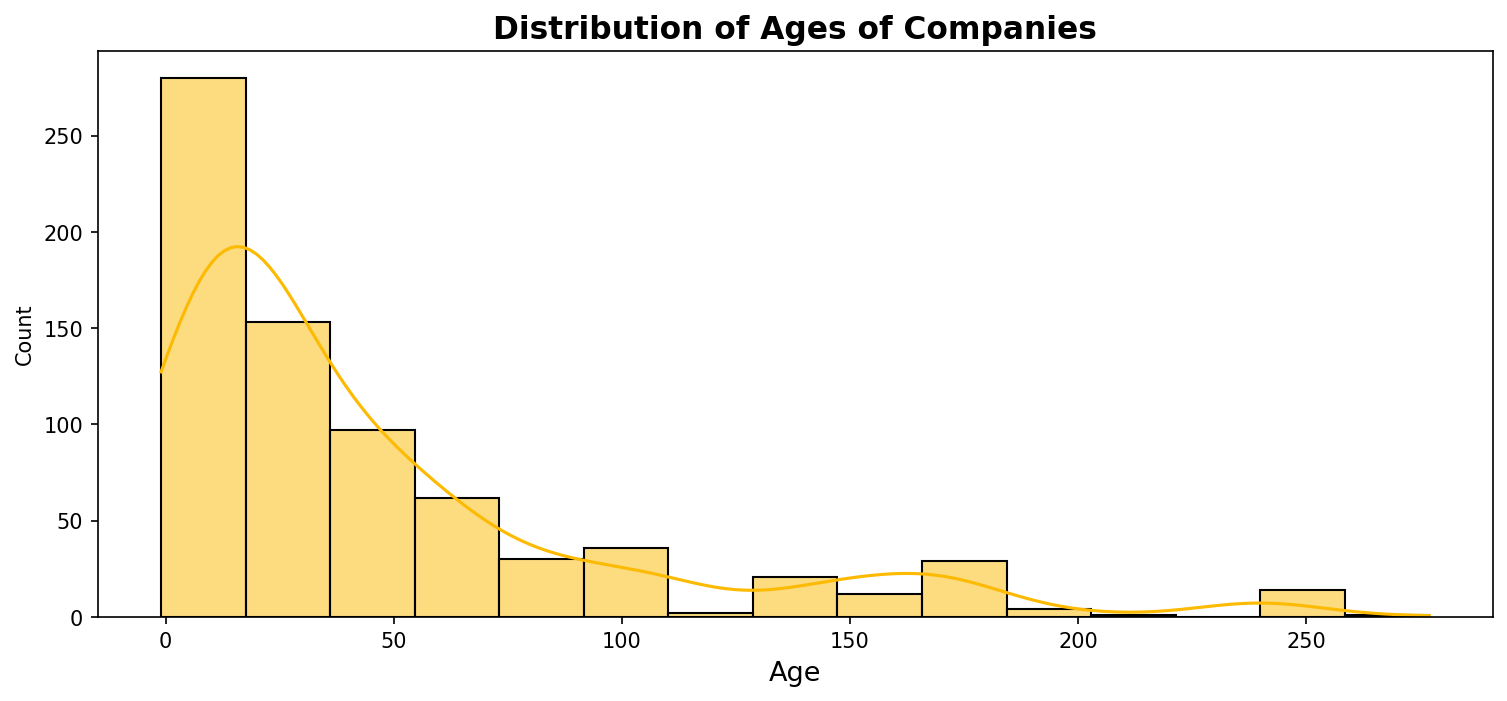

In [23]:
#dist of age of all companies 
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=150)

fig = sns.histplot(data=df,
                   ax=ax,
                   x=df.Age,
                   bins=15,
                   color='#fcba03',
                   kde=True)

fig.set_title('Distribution of Ages of Companies',
              fontsize=15,
              color='black',
              fontweight=700)

fig.set_xlabel('Age',
               fontsize=13)

plt.show()

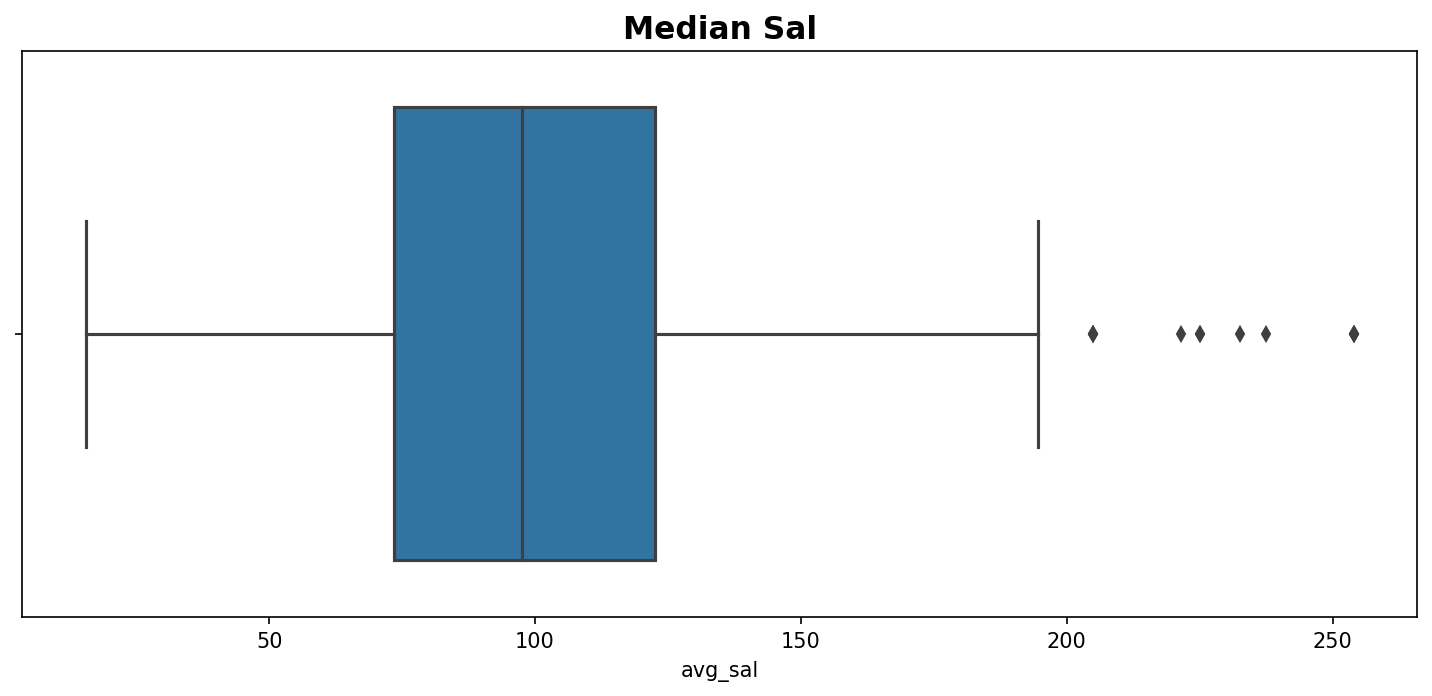

In [24]:
#let's use a boxplot to find the median avg salary as well as the outliers 
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=150)

fig = sns.boxplot(data=df,
                  x=df.avg_sal)

fig.set_title('Median Sal',
              fontsize=15,
              color='black',
              fontweight=700)

plt.show()

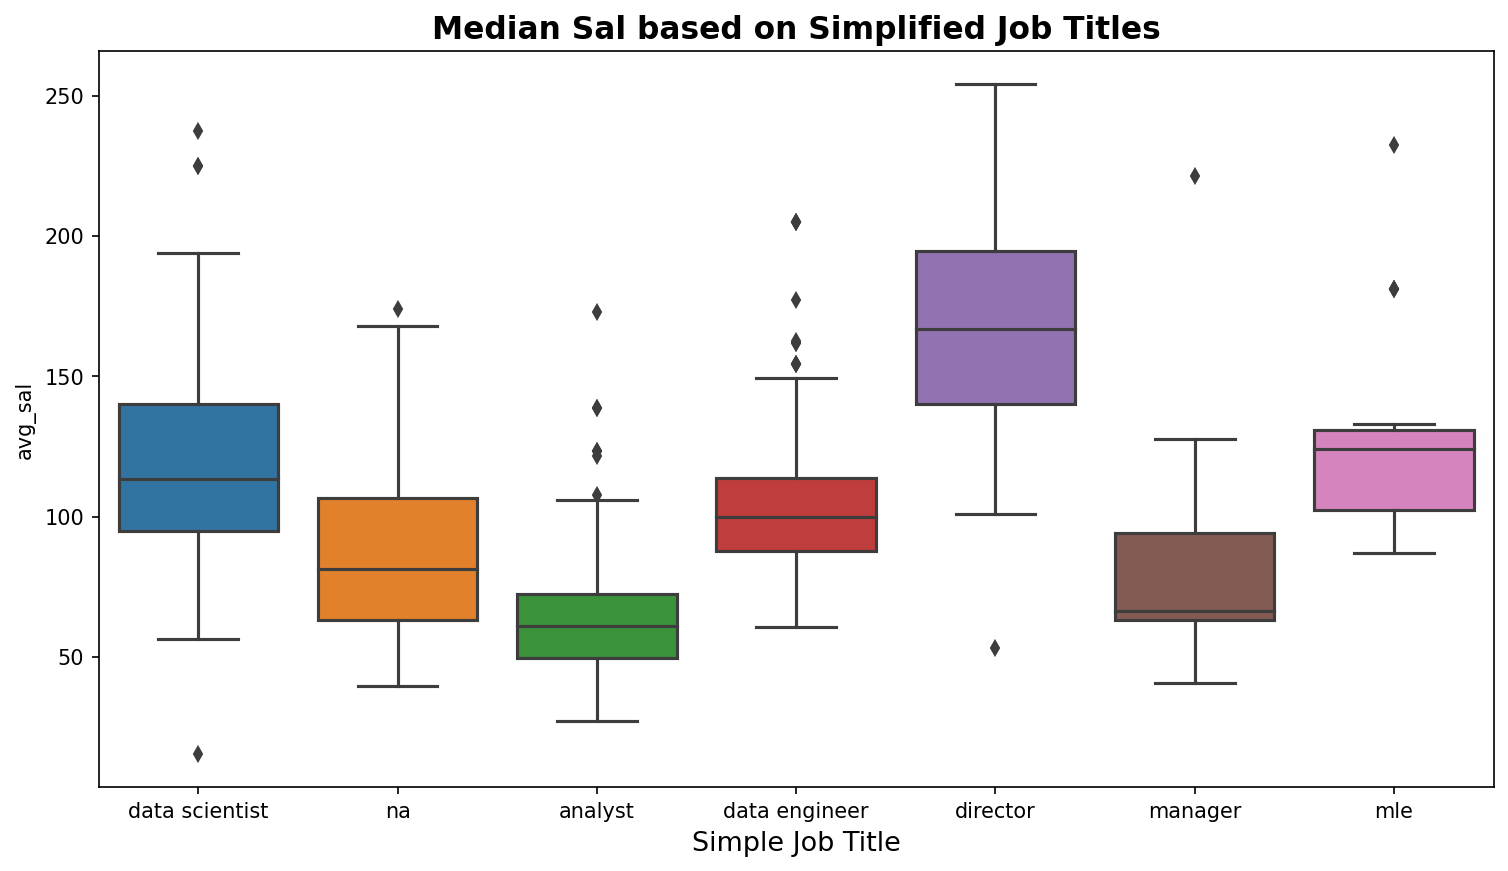

In [25]:
#let's use a boxplot to find the median avg salary based on diff (mostly DS) job titles
fig, ax = plt.subplots(1,1,figsize=(12,6.5), dpi=150)

fig = sns.boxplot(data=df,
                  x=df.title_simp,
                  y=df.avg_sal)

fig.set_title('Median Sal based on Simplified Job Titles',
              fontsize=15,
              color='black',
              fontweight=700)

fig.set_xlabel('Simple Job Title',
               fontsize=13)
plt.show()

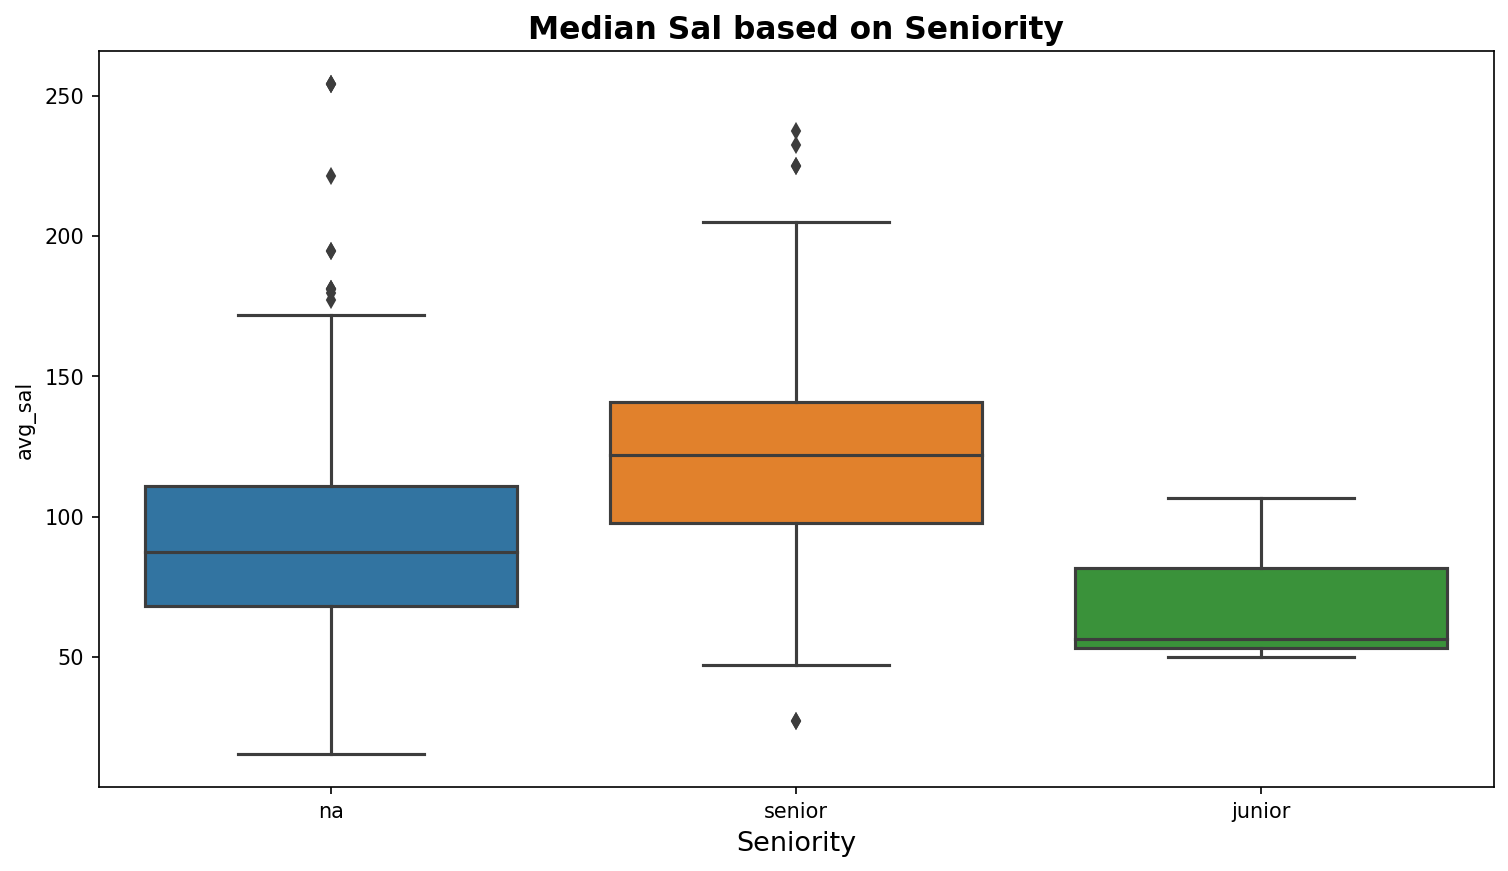

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12,6.5), dpi=150)

fig = sns.boxplot(data=df,
                  x=df.seniority,
                  y=df.avg_sal)

fig.set_title('Median Sal based on Seniority',
              fontsize=15,
              color='black',
              fontweight=700)

fig.set_xlabel('Seniority',
               fontsize=13)
plt.show()

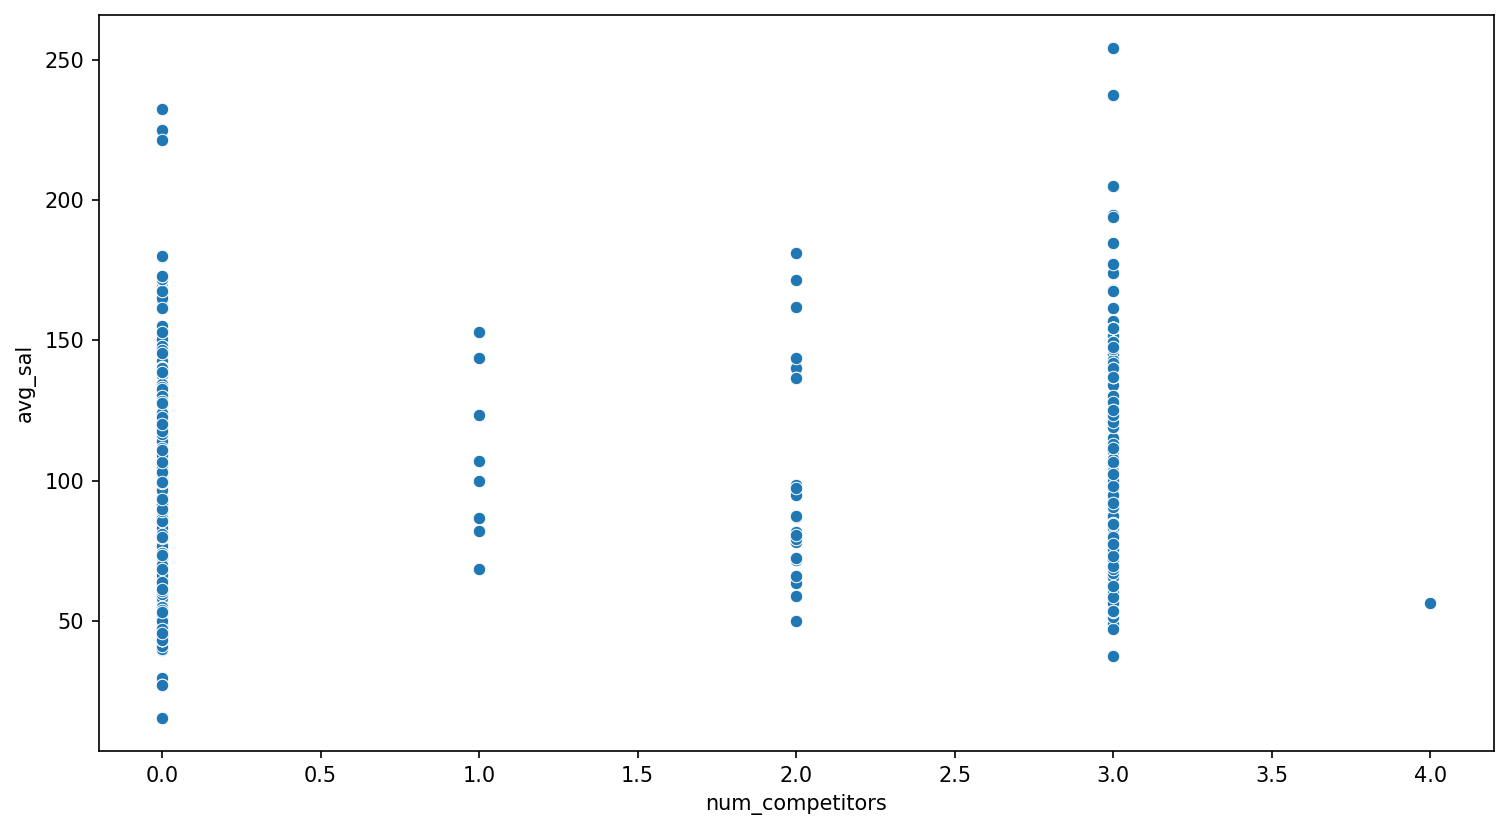

In [27]:
#how the number of competitors affects the avg salary 
fig, ax = plt.subplots(1,1,figsize=(12,6.5), dpi=150)

fig = sns.scatterplot(data=df,
                      x=df.num_competitors,
                      y=df.avg_sal,
                      ax=ax)

plt.show() #there is no linear relation between the number of competitors and the avg sal

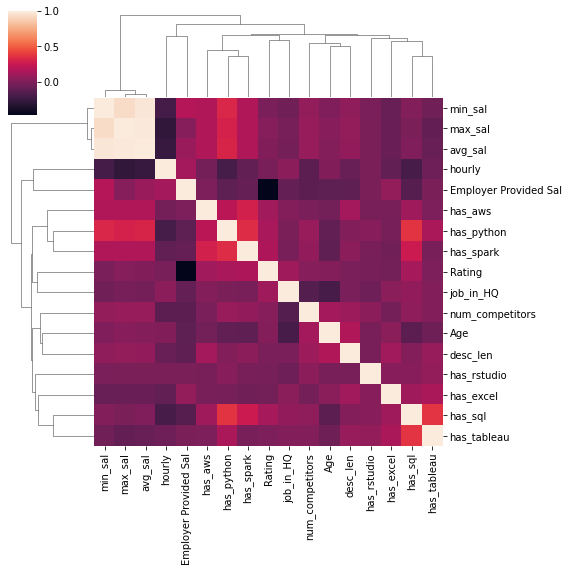

In [31]:
#let's look at the correlation btwn various numerical columns
#ie. how much they affect each other
fig = sns.clustermap(df.corr(),
                     figsize=(8,8))

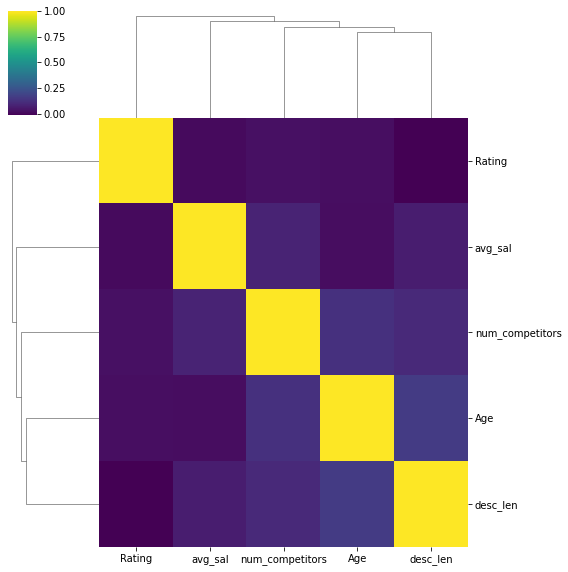

In [32]:
fig = sns.clustermap(df[['avg_sal','Rating','Age','desc_len','num_competitors']].corr(),
                     figsize=(8,8),
                     cmap='viridis')

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Sal', 'min_sal', 'max_sal', 'avg_sal',
       'State', 'Age', 'job_in_HQ', 'has_python', 'has_spark', 'has_sql',
       'has_rstudio', 'has_excel', 'has_aws', 'has_tableau', 'title_simp',
       'seniority', 'desc_len', 'num_competitors'],
      dtype='object')

In [102]:
df_cat = df[['Size','Type of ownership','Location','Revenue', 'Headquarters','Industry','Sector','hourly', 'Employer Provided Sal','job_in_HQ', 'has_python', 'has_spark', 'has_sql',
       'has_rstudio', 'has_excel', 'has_aws', 'has_tableau', 'title_simp',
       'seniority']]

#df_cat

In [71]:
# fig = sns.countplot(x=df_cat.Size)
# fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

# plt.show()

In [72]:
# for i in df_cat.columns:
#     print(f'This is the graph for {i}, Total={len(df_cat[i])}')
#     fig = sns.countplot(x=df_cat[i])
    
#     fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    
#     plt.show()

In [73]:
# val = df_cat.Size.value_counts()
# val

# fig = sns.barplot(x=val.index, y=val.values)
# fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

# plt.show()

This is the Size column, Total instances = 9


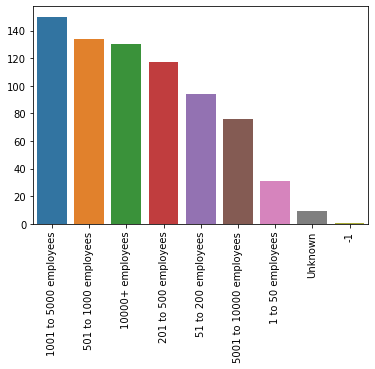

This is the Type of ownership column, Total instances = 11


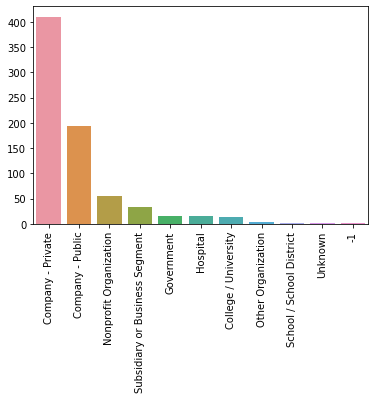

This is the Location column, Total instances = 200


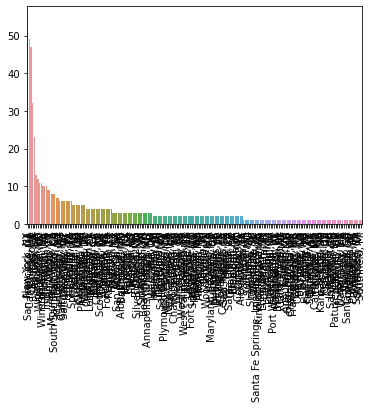

This is the Revenue column, Total instances = 14


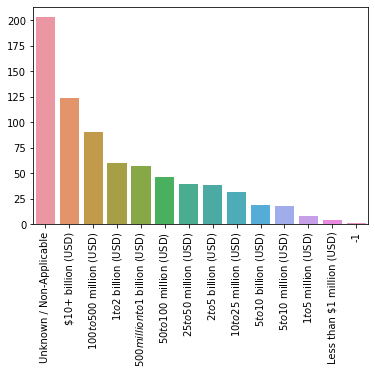

This is the Headquarters column, Total instances = 198


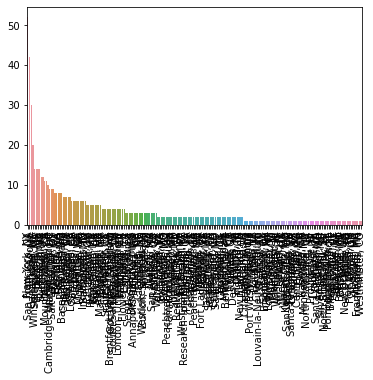

This is the Industry column, Total instances = 60


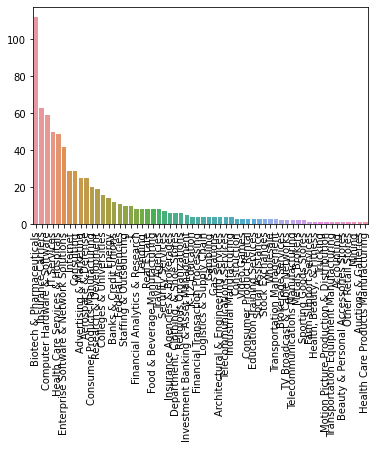

This is the Sector column, Total instances = 25


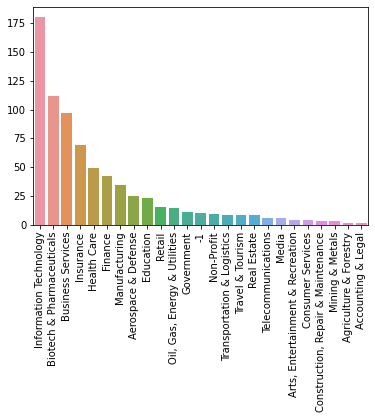

This is the hourly column, Total instances = 2


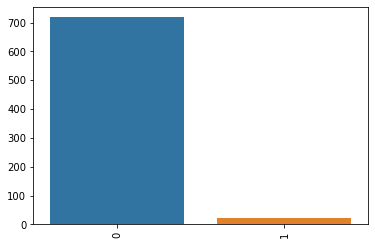

This is the Employer Provided Sal column, Total instances = 2


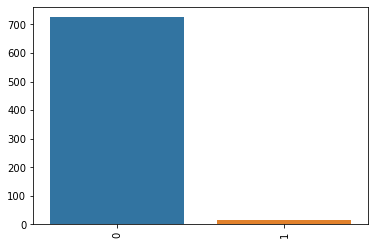

This is the job_in_HQ column, Total instances = 2


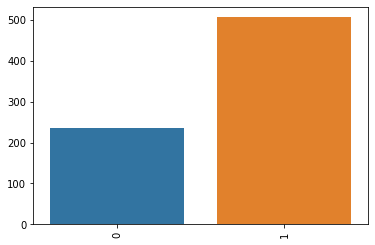

This is the has_python column, Total instances = 2


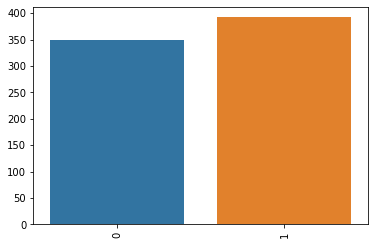

This is the has_spark column, Total instances = 2


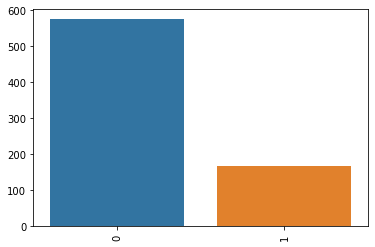

This is the has_sql column, Total instances = 2


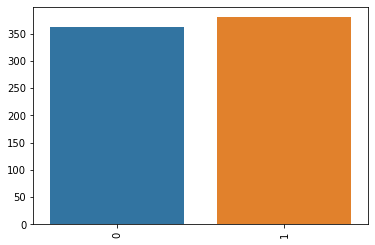

This is the has_rstudio column, Total instances = 2


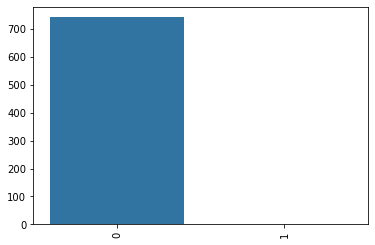

This is the has_excel column, Total instances = 2


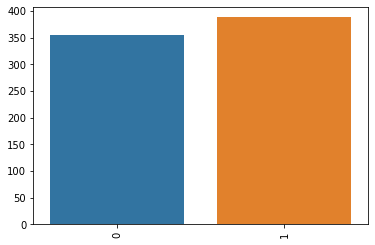

This is the has_aws column, Total instances = 2


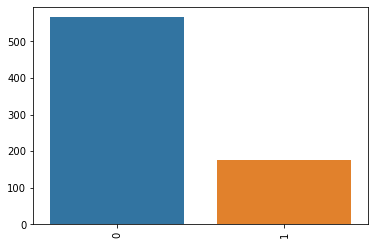

This is the has_tableau column, Total instances = 2


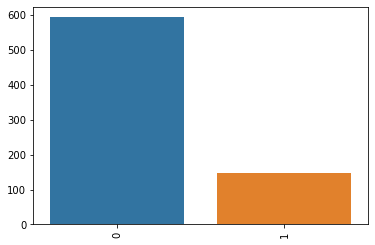

This is the title_simp column, Total instances = 7


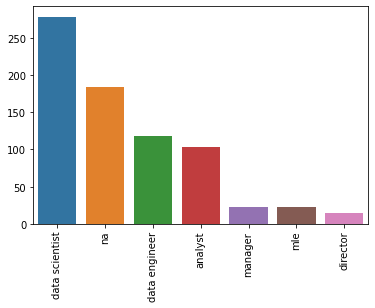

This is the seniority column, Total instances = 3


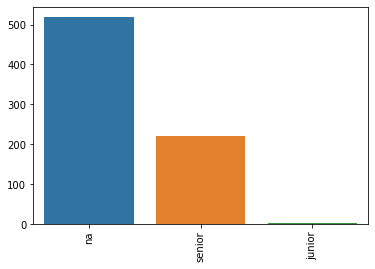

In [103]:
for i in df_cat.columns:
    val = df_cat[i].value_counts()
    
    print(f'This is the {i} column, Total instances = {len(val.index)}')
    
    fig = sns.barplot(x=val.index, y=val.values,)
    
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    
    plt.show()

This is the Industry column, Total instances = 20


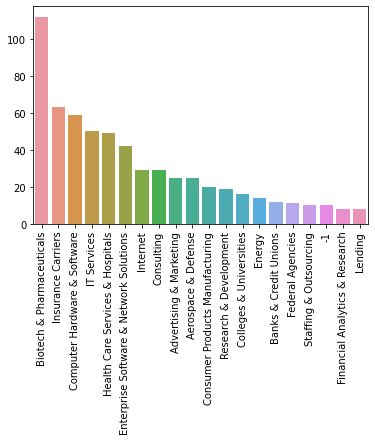

This is the Location column, Total instances = 20


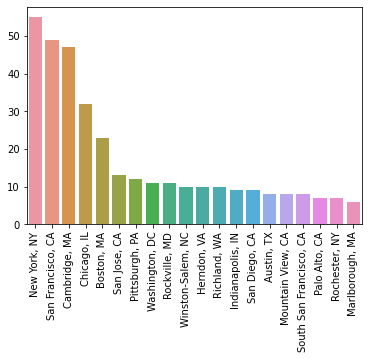

This is the Headquarters column, Total instances = 20


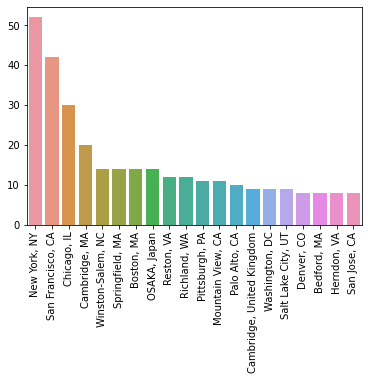

In [107]:
#let's look at the top 20 categories for the larger columns 

for i in df_cat[['Industry','Location','Headquarters']]:
    val = df_cat[i].value_counts()[:20]
    
    print(f'This is the {i} column, Total instances = {len(val.index)}')
    
    fig = sns.barplot(x=val.index, y=val.values,)
    
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    
    plt.show()

In [118]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Sal', 'min_sal', 'max_sal', 'avg_sal',
       'State', 'Age', 'job_in_HQ', 'has_python', 'has_spark', 'has_sql',
       'has_rstudio', 'has_excel', 'has_aws', 'has_tableau', 'title_simp',
       'seniority', 'desc_len', 'num_competitors'],
      dtype='object')

In [119]:
#grouping by the simplified job title and then the seniority level
#afterwards we are finding the mean salary

pd.pivot_table(df, index=['title_simp', 'seniority'], values='avg_sal')

avg_sal
title_simp     seniority            
analyst        junior      53.250000
               na          61.270270
               senior      80.092593
data engineer  na          97.172840
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          78.500000
               senior     109.061404

In [135]:
#looking at the avg sal for each state
pd.set_option('display.max_rows', 500)

pd.pivot_table(df, index=['State', 'title_simp'], values='avg_sal').sort_values('State', axis=0,
                                                                ascending=True)

avg_sal
State title_simp                
AL    analyst          62.200000
      data engineer    65.000000
      na               43.750000
AZ    analyst          55.000000
      data engineer    79.500000
      data scientist   69.500000
      na              124.500000
CA    mle             177.300000
      manager          80.611111
      na               99.907407
      data engineer   129.540000
      analyst          85.250000
      data scientist  142.522059
CO    analyst          29.500000
      data engineer    99.000000
      data scientist  108.666667
      mle             100.500000
      na               63.000000
CT    data scientist   84.000000
      na               62.500000
DC    analyst          63.500000
      data engineer    85.000000
      data scientist  149.000000
DE    na               55.000000
FL    data engineer    91.833333
      data scientist   97.357143
      analyst          47.500000
GA    data scientist   81.333333
      na               80.000000
IA    analyst          43.000000
      data engineer   102.833333
ID    analyst          56.250000
IL    na               57.166667
      analyst          64.500000
      data engineer   101.500000
      data scientist  117.233333
      director        221.750000
      mle             133.000000
IN    na               69.000000
      data scientist   84.500000
      data engineer   114.500000
KS    mle              87.000000
KY    data scientist   84.000000
      na              103.500000
LA    analyst          48.000000
      data engineer    70.500000
      na               40.000000
MA    manager          71.900000
      director        117.833333
      na              110.010870
      data engineer   107.291667
      analyst          59.125000
      data scientist  113.750000
MD    data scientist  109.115385
      na               88.750000
      analyst          80.666667
      data engineer   109.000000
MI    data scientist  106.625000
      manager          87.500000
MN    analyst          76.000000
      data engineer    95.000000
MO    analyst          61.000000
      data scientist  127.666667
      manager          40.500000
      na               72.333333
NC    data engineer   104.250000
      data scientist  117.000000
      na               90.916667
NE    na               53.500000
NJ    na               82.500000
      manager         109.500000
      director        161.500000
      data engineer   112.000000
      data scientist  106.875000
      analyst          83.583333
NM    data scientist   74.333333
NY    analyst          65.607143
      data engineer    86.375000
      data scientist  115.250000
      mle             125.000000
      na               81.583333
OH    na               91.166667
      analyst          53.875000
      data scientist  105.285714
OR    data scientist   98.500000
      data engineer    73.000000
PA    analyst          62.750000
      data engineer    91.500000
      data scientist  113.333333
      manager         109.666667
      mle             120.500000
      na               81.187500
RI    analyst         100.000000
SC    na               60.500000
TN    analyst          27.000000
      data engineer   100.950000
      data scientist   96.000000
TX    data scientist  100.730769
      na               53.571429
      data engineer   113.062500
UT    analyst          54.750000
      data engineer   100.333333
      data scientist  140.500000
VA    analyst          71.583333
      data engineer    96.900000
      data scientist  108.416667
      mle              87.000000
      na               79.300000
WA    analyst          54.500000
      data scientist   99.764706
      na               97.500000
WI    data scientist  113.500000
      analyst          58.833333
      na               54.000000

In [142]:
#what states pay data scientists the highest?
pd.pivot_table(df[df['title_simp'] == 'data scientist'], index=['State'], values='avg_sal').sort_values('avg_sal',
                                                                                                        axis=0,
                                                                                                        ascending=False)

,avg_sal
State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [143]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Sal', 'min_sal', 'max_sal', 'avg_sal',
       'State', 'Age', 'job_in_HQ', 'has_python', 'has_spark', 'has_sql',
       'has_rstudio', 'has_excel', 'has_aws', 'has_tableau', 'title_simp',
       'seniority', 'desc_len', 'num_competitors'],
      dtype='object')

In [155]:
#let's look at how various columns affect the avg sal
df_pivot = df[['Rating', 'Size', 'Industry', 'Sector', 'Revenue', 'hourly', 'Employer Provided Sal', 'job_in_HQ', 'has_python', 'has_spark', 'has_sql',
       'has_rstudio', 'has_excel', 'has_aws', 'has_tableau', 'avg_sal']]

In [164]:
#let's look at the average salary for unique instances of various columns

for i in df_pivot.columns:
    if i == 'avg_sal':
        break
    else: 
        piv = pd.pivot_table(df_pivot, index=df_pivot[i], values='avg_sal').sort_values('avg_sal', axis=0, ascending=False)
        print(f'{piv}\n\n')
    

           avg_sal
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286


                            avg_sal
Size                               
Unknown                  128.111111
-1                       117.500000
10000+ employees         112.769231
51 to 200 employees      111.744681
1 to 50 employees        104.870968
201 to 500 employees     100.247863
5001 to 10000 employees   97.447368
1001 to 5000 employees    94.590000
501 to 1000

In [175]:
#let's see the avg sal for a person that is or is not skilled in python
#based on Company Revenue

pd.pivot_table(df_pivot, index='Revenue', columns='has_python', values='avg_sal') #.sort_values('has_python', ascending=False)

#so in conclusion, knowing python almost always earns one a higher salary 

has_python,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),83.187500,119.843750
$10+ billion (USD),103.151515,129.698276
$100 to $500 million (USD),72.840426,100.068182
$2 to $5 billion (USD),80.588235,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [196]:
#who is looking for more python ppl 
pd.pivot_table(df_pivot, index='Revenue', columns='has_python', values='avg_sal', aggfunc='count')

#in conclusion, more jobs need python

has_python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [199]:
# from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

In [200]:
# words = " ".join(df['Job Description'])

# def punctuation_stop(text):
#     """remove punctuation and stop words"""
#     filtered = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
#     for w in word_tokens:
#         if w not in stop_words and w.isalpha():
#             filtered.append(w.lower())
#     return filtered


# words_filtered = punctuation_stop(words)

# text = " ".join([ele for ele in words_filtered])

# wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
# wc.generate(text)

# plt.figure(figsize=[10,10])
# plt.imshow(interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [201]:
df.to_csv('eda.csv', index=False)

In [203]:
df2 = pd.read_csv('eda.csv')
df2

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,has_spark,has_sql,has_rstudio,has_excel,has_aws,has_tableau,title_simp,seniority,desc_len,num_competitors
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,1,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,1,0,1,0,0,data scientist,na,3495,0
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,0,1,0,0,data scientist,na,2748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,0,0,0,0,1,0,na,senior,6219,3
738,Senior Data Engineer,72-133,THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,1,1,0,0,1,0,data engineer,senior,6167,3
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,0,0,0,1,0,0,na,na,3107,0
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,0,0,0,1,0,0,manager,na,1678,0
